# Airbnb-hintaennustin 

#### Johdatus datatieteeseen 2019 syksy,  harjoitustyö, Tapio Vaaranmaa (54338)



### 1. Kehitysympäristö

Hintaennustin tehtiin Python-koodilla Jupyter Notebooks -työkalun avulla. Myös dokumentaation kirjoitin suoraan Jupyter Notebook -tiedostoon Markdown-soluihin.  Kehitysympäristöksi asensin omaan kannettavaan tietokoneeseeni Jupyter Notebooksin sisältävän Anaconda-alustan (2019-10, Anaconda Navigator 1.9.7). Anaconda on erityisesti datatieteeseen ja koneoppiseen soveltuva ja runsaasti käytetty avoin Python- ja R-alusta, jota on helppo laajentaa Conda-paketinhallintatyökalulla. Anaconda Navigator on Anaconda-alustan graafinen käyttöliittymä, jolla voi luoda ja hallita erillisiä ympäristöjä sekä käynnistää valittuun ympäristöön asennettuja sovelluksia. Jupyter Notebook on selaimella käytettävä web-sovellus. Sitä käytetään aina selaimesta siitä riippumatta, onko sen palvelin paikallisella tietokoneella vai verkon takana.

Käyttöjärjestelmänä on Ubuntu 18.04 Linux, ja harjoitustyön julkaisualustana on [GitHub-repositorio](https://github.com/hip-pi/AirbnbVienna.git). Editorina käytin Visual Studio Codea ja vanhaa kunnon Emacsia, joskaan niitä ei juurikaan tarvinnut, sillä lähes kaiken sai kätevästi tehtyä suoraan Jupyter Notebookilla.  Asentamani Anaconda-distribuution Pythonin versio on 3.7.4 ja Jupyter Notebookin versio on 6.0.1. 

Asennuksessa tuli vähän sekoiltua, kun asensin ensin Pythonin uuden version suoraan ja sain koko käyttöjärjestelmän sekaisin määrittelemällä tämän uuden Python-tulkin oletustulkiksi: terminaaliohjelmakaan ei enää käynnistynyt. Tämä johtui siitä, että Linux-käyttöjärjestelmässä käynnistetään kaikenlaista Pythonin avulla ja tämä koodi on vanhempaa Pythonia, joten kaikki ei enää käynnistynyt käyttöjärjestelmässä kuten pitäisi. Tämä asennus oli kaiken lisäksi ihan turha, sillä Anacondan mukana tulee tarvittava Python-ympäristökin. Poistin tuhan asennuksen ja asensin Anacondan ohjeiden mukaisesti. Linuxiin asentaminen ei ole ihan niin suoraviivaista kuin Windowsiin, mutta netistä löytyneiden [ohjeiden](https://www.digitalocean.com/community/tutorials/how-to-install-the-anaconda-python-distribution-on-ubuntu-18-04) avulla se sujui kuitenkin kohtuullisen kivuttomasti.

Toinen varteenotettava vaihtoehto olisi ollut käyttää Jypyter Notebook -sovellusta CSC Notebooks -pilvipalvelun aikarajoitetutussa virtuaalikoneessa kuten koodiklinikalla tehtiin. Päädyin kuitenkin asentamaan tarvittavat ohjelmat omaan kannettavaan tietokoneeseeni, sillä sitä olisin kuitenkin käyttänyt, vaikka sovellusta olisikin ajettu verkon yli. Tämän vuoksi helpointa oli tehdä kaikki suoraan paikallisesti omalla koneella, ja näin ympäristökin jää minulle talteen.

### 2. Datan kerääminen ja tarkastelu
Päätin käyttää  [Inside Airbnb](http://insideairbnb.com/) -datasettiä. Olisi ollut mielenkiintoisempaa tutkia jotain muuta data-aineistoa, mutta kurssi oli pakko jo saada pakettiin mahdollisimman pian ja siksi päätin valita tämän valmiin ja harjoituksista tutun datasetin. Tutkittavaksi kaupungiksi valitsin Wienin, sillä kaikki minulle tutummat kaupungit oli jo valittu tutkittavaksi. Minulle tutummista Budapestistä ja Etelä-Ranskan kaupungeista ei ollut data-aineistoa tässä datasetissä, enkä halunnut valita myöskään harjoituksissa käsiteltyä Berliiniä. Wien oli ainoa käsittelemätön kaupunki, josta minulla oli ennestään edes joku käsitys.

Inside Airbnb -datasetissä on Wienistä tallennettuna tiedostot listings.csv.gz, calendar.csv.gz, reviews.csv.gz, listings.csv, reviews.csv, neighbourhoods.csv ja neighbourhoods.geojson. Näistä ensimmäinen on mielenkiintoisin sisältäen yksityiskohtaista tietoa varauskohteista, toinen sisältää yksityiskohtaisen varauskalenterin ja kolmas kohteiden tekstimuotoisia arviointeja. Kaksi pakkaamatonta tiedostoa ovat vastaavien pakattujen tiedostojen yhteenvetoja ja viimeinen tiedosto sisältää tiedostossa neighbourhoods.csv lueteltujen kaupunginosien paikkatietoja. Dataa oli yli 10 tuhannesta kohteesta, joten sitä oli riittävästi, ja tiedot oli päivitetty viimeksi 19.11. 2019, joten data lienee ajantasaista ja luotettavaa.

Harjoitustyön pohjana käytin Nick Amaton blogia [Airbnb price predictor](https://mapr.com/blog/predicting-airbnb-listing-prices-scikit-learn-and-apache-spark/). Ihan ensimmäisenä otetaan käyttöön datan keräämiseen, jalostamiseen, kuvailemiseen sekä koneoppimisessa tarvittavia kirjastoja. Tutustuin aluksi tiedostojen tiedostot listings.csv.gz, calendar.csv.gz, reviews.csv.gz sisältöihin lukemalla ne Pandas-kirjaston dataframeiksi. Listings-dataframe sisälsi yhteensä 106 eri saraketta kohdeindeksi mukaan lukien. Reviews-dataframessa ainoa varsinainen tietosarake sisälsi tekstimuotoisia arvosteluja, joiden hyödyntäminen olisi ollut varsin vaikeaa tässä työssä. En myöskään kokenut tarpeelliseksi käyttää Calendar-dataframen tietoja hintaennustimessa, sillä sen sisältämät tulevaisuuden varaustiedot ja hintapyynnöt eivät tuntuneet ennusteen kannalta relevanteilta selittäjiltä. Tämän vuoksi päätin käyttää ennustimessa vain listings-titoja ja pitäytyä alkuperäisen esimerkin sarakevalinnoissa. Otin kuitenkin lisäksi mukaan avainkentän ’id’ siltä varalta, että haluaisin kuitenkin myöhemmin hyödyntää calendar- tai reviews-tietoja.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import linear_model
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
listings_file = 'http://data.insideairbnb.com/austria/vienna/vienna/2019-11-19/data/listings.csv.gz'
calendar_file = 'http://data.insideairbnb.com/austria/vienna/vienna/2019-11-19/data/calendar.csv.gz'
reviews_file  = 'http://data.insideairbnb.com/austria/vienna/vienna/2019-11-19/data/reviews.csv.gz'


In [3]:
df_c = pd.read_csv(calendar_file, compression='gzip')

In [4]:
df_c.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,15883,2019-11-20,f,$106.00,$106.00,1,999
1,532596,2019-11-20,f,$160.00,$160.00,28,100
2,532596,2019-11-21,f,$160.00,$160.00,28,100
3,532596,2019-11-22,t,$160.00,$160.00,28,100
4,532596,2019-11-23,t,$160.00,$160.00,28,100


In [5]:
df_r = pd.read_csv(reviews_file, compression='gzip')

In [6]:
df_r.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,15883,29643839,2015-04-10,30537860,Robert,"If you need a clean, comfortable place to stay..."
1,15883,80590019,2016-06-19,37529754,Chuang,It's so nice to be in the house! It's a peace ...


In [7]:
df = pd.read_csv(listings_file, compression='gzip')

In [8]:
print(df.columns[0:50])
print(df.columns[50:106])
len(df)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude'],
      dtype='object')
Index(['is_location_exact', 'property_type', 'room_type', 'accommodate

12615

In [9]:
cols = ['id',
        'price',
        'accommodates',
        'bedrooms',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'instant_bookable',
        'reviews_per_month',
        'number_of_reviews',
        'availability_30',
        'review_scores_rating'
        ]

# read the file into a dataframe
df = pd.read_csv(listings_file, compression='gzip', encoding='utf-8', usecols=cols)

In [14]:
print(df.head())

      id neighbourhood_cleansed        room_type  accommodates  bedrooms  \
0  15883             Donaustadt       Hotel room             3       1.0   
1  38768           Leopoldstadt  Entire home/apt             5       1.0   
2  40625   Rudolfsheim-Fnfhaus  Entire home/apt             6       2.0   
3  51287           Leopoldstadt  Entire home/apt             3       0.0   
4  70568             Donaustadt  Entire home/apt             2       1.0   

   beds    price  availability_30  number_of_reviews  review_scores_rating  \
0   1.0   $85.00               21                 10                  96.0   
1   3.0   $65.00               10                303                  95.0   
2   4.0  $130.00               19                149                  97.0   
3   2.0   $60.00                9                281                  92.0   
4   1.0   $59.00               30                 10                  94.0   

  instant_bookable          cancellation_policy  reviews_per_month  
0    

Tarkastellessani dataframen sisältöä, huomasin, että osa sarakkeen ’ neighbourhood_cleansed’ merkeistä jää tulostumatta oikein. Tämän ongelman selvittämiseksi ja korjaamiseksi piti tehdä vähän lisätarkasteluja.

In [10]:
df.neighbourhood_cleansed.unique()

array(['Donaustadt', 'Leopoldstadt', 'Rudolfsheim-F\x9fnfhaus',
       'Ottakring', 'Brigittenau', 'Neubau', 'Margareten', 'Hernals',
       'Floridsdorf', 'Simmering', 'Wieden', 'Alsergrund', 'Innere Stadt',
       'Mariahilf', 'Meidling', 'Josefstadt', 'Landstra§e', 'Favoriten',
       'W\x8ahring', 'Penzing', 'D\x9abling', 'Liesing', 'Hietzing'],
      dtype=object)

In [11]:
df1 = pd.read_csv(listings_file, compression='gzip', encoding='utf-8', usecols=['neighbourhood'])
df1.neighbourhood.unique()

array(['Donaustadt', 'Leopoldstadt', 'Rudolfsheim-Fünfhaus', 'Ottakring',
       'Brigittenau', 'Neubau', 'Margareten', 'Hernals', 'Floridsdorf',
       'Simmering', 'Wieden', 'Alsergrund', 'Innere Stadt', 'Mariahilf',
       'Meidling', 'Josefstadt', 'Landstraße', 'Favoriten', 'Währing',
       'Penzing', 'Döbling', 'Liesing', 'Heitzing', nan], dtype=object)

Tarkasteltuani muiden sarakkeiden sisältöjä huomasin, että sarakkeen ’ neighbourhood_cleansed’ merkit on koodattu eri tavalla kuin muiden sarakkeiden merkit. Muualla koodaus oli utf-8, mutta sarakkeessa ’ neighbourhood_cleansed’ oli varsin epämääräinen koodaus. Koodaus vaikutti olevan muuten utf-8, mutta umlaut-merkien ja ß -merkin jälkimmäinen tavu näytti olevan mac_roman-koodauksen vastaava tavukoodi. Korjasin nämä virheelliset merkit metodin replace avulla, minkä jälkeen sarakkeen ’neighbourhood_cleansed’ näytti taas järkevältä ja kaupunginosien nimet tulostuivat siinä oikein.

Tämän asian ymmärtämiseen kului käsittämättömän paljon aikaa, sillä ensin luulin koko tiedoston merkkikoodauksen olevan joku erikoisempi, mutta mitään sopivaa ei löytynyt. Selitys löytyi vasta, kun aloin tutkia merkkijonojen tavusisältöä. Sitäkään tehdessä ei ensimmäisenä tule mieleen, että koodaus mennyt sekaisin, mutta mitään muuta selitystä en keksinyt. Muidenkin saksakielisten kaupunkien tiedostoja katselin enkä löytänyt niistä samaa ongelmaa.

In [12]:
df['neighbourhood_cleansed'] = \
    df['neighbourhood_cleansed'].replace(['\u008A','\u009A','\u009F','\u0080','\u0085','\u0086','\u00A7'], \
                                         ['ä','ö','ü','Ä','Ö','Ü','ß'], regex=True)
df.neighbourhood_cleansed.unique()

array(['Donaustadt', 'Leopoldstadt', 'Rudolfsheim-Fünfhaus', 'Ottakring',
       'Brigittenau', 'Neubau', 'Margareten', 'Hernals', 'Floridsdorf',
       'Simmering', 'Wieden', 'Alsergrund', 'Innere Stadt', 'Mariahilf',
       'Meidling', 'Josefstadt', 'Landstraße', 'Favoriten', 'Währing',
       'Penzing', 'Döbling', 'Liesing', 'Hietzing'], dtype=object)

Talletetaan dataframe tiedostoon, jotta sen sisältöä voi halutessaan tarkastella myös muilla työkaluilla (esimerkiksi taulukkolaskentaohjelmalla).

In [13]:
df.to_csv('data.csv')

len(df.index)

12615

Kenttä ’ neighbourhood_cleansed’ sisältää kohteen kaupunginosan osan nimen. Kun tarkastellaan sen jakaumaa, havaitaan jakauman olevan Wienin datassa yllättävän tasainen: vain yhdessä kaupunginosassa on alle 100 kohdetta ja enimmillään kohteita on 1300. Kaupunginosia on yhteensä 23, joten kaupunginosajakokaan ei ole liian tarkka. Tämä kenttä vaikuttaa tässä aineistossa varsin käyttökelpoiselta, sillä eri kaupunginosista on varsin mukavasti rivejä. Esimerkissä käyytetty San Franciscon data oli paljon epätasaisemmin jakautunut.

In [14]:
nb_counts = Counter(df.neighbourhood_cleansed)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)

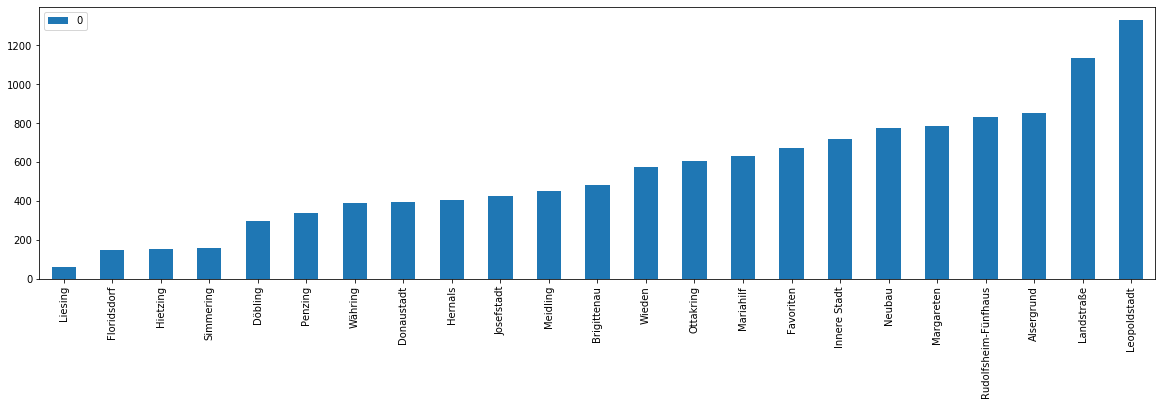

In [15]:
# Redefining visualization width
plt.rcParams["figure.figsize"] = [20, 5]
tdf.plot(kind='bar')

In [16]:
len(nb_counts)

23

In [17]:
df_nb = pd.DataFrame.from_dict(nb_counts, orient='index', columns=['count'])
df_nb.columns

Index(['count'], dtype='object')

In [18]:
df_nb.sort_values(by=['count'], ascending=False).head(10)

,count
Leopoldstadt,1332
Landstraße,1135
Alsergrund,853
Rudolfsheim-Fünfhaus,832
Margareten,784
Neubau,777
Innere Stadt,719
Favoriten,673
Mariahilf,631
Ottakring,604


This data is coming in a little raw, so some cleaning is in order.

Particularly, the 'number_reviews' and 'reviews_per_month' fields look like they need some special processing to remove a large number of NaN values. Rather than discarding these outright, we set the value of 'reviews_per_month' to 0 where there is currently a NaN, because some quick analysis shows that this field is NaN only wherever 'number_of_reviews' is 0 (which makes some intuitive sense).

We also drop any entries that are obviously strange, such as listings with a value of 0 for bedrooms, beds, or price, then finally drop any remaining rows that have any NaN values. The resulting dataset contains 5246 entries, a subset of the original 7029.

In [19]:
# the number of entries with 0 'number_of_reviews' which do not a NaN for 'reviews_per_month'
len(df[(df.number_of_reviews == 0) & (pd.isnull(df.number_of_reviews) == False)
       & (pd.isnull(df.reviews_per_month) == False)].index)

0

In [20]:
# the number of entries with at least 1 'number_of_reviews' which have a NaN for 'reviews_per_month'
len(df[(df.number_of_reviews != 0) & (pd.isnull(df.number_of_reviews) == False)
       & (pd.isnull(df.reviews_per_month) == True)].index)

0

In [21]:
# so we need to do some cleaning.

# first fixup 'reviews_per_month' where there are no reviews
df['reviews_per_month'].fillna(0, inplace=True)

# just drop rows with bad/weird values
# (we could do more here)
df = df[df.bedrooms != 0]
df = df[df.beds != 0]
#df = df[df.price != 0]      # TÄTÄ EI VOI TEHDÄ VIELÄ TÄSSÄ, sillä ensin on poistettava $-merkit
df = df.dropna(axis=0)

len(df.index)

9347

The last bit of cleaning/filtering we'll do is convert the 'price' column to floating point, and drop all of the entries with more than one bedroom.

Approximately 70% of the entries in this file are for one bedroom listings (in large cities, especially San Francisco, this might be the norm), so it's the type of unit for which we have the most samples. By focusing our regression on a single type of unit, our model will be better as there is less to discover about the complex interactions with other features (such as whether the unit is shared, private, or has a private room). To make predictions for larger units, one way to go would be to develop separate models for each of the different sizes (2, 3, 4 bedrooms, etc.), or do some clustering to see if it is better to partition the data in some other way.

In [22]:
df = df[df.bedrooms == 1]
len(df.index)

6807

In [23]:
df.price.head(5)

0    $85.00
1    $65.00
4    $59.00
5    $50.00
8    $55.00
Name: price, dtype: object

In [24]:
# remove the $ from the price and convert to float
df['price'] = df['price'].replace('[\$,)]','',  \
        regex=True).replace('[(]','-', regex=True).astype(float)
df.price.sort_values(ascending=False).head(80)

1258     9270.0
9735     5000.0
3275     1900.0
8912     1000.0
8928     1000.0
          ...  
6522      440.0
8040      390.0
11629     319.0
8655      300.0
1814      300.0
Name: price, Length: 80, dtype: float64

In [25]:
df.price.sort_values(ascending=True).head(80)

6631      9.0
2025      9.0
7892      9.0
6821     10.0
5492     10.0
         ... 
7314     16.0
3361     16.0
2062     16.0
3493     16.0
11573    16.0
Name: price, Length: 80, dtype: float64

Nyt $-merkit on poistettu hintakentästä ja se on muutettu liukuluvuksi, joten dataframesta voidaan poistaa ne rivit, joista hinta puuttuu. Näitä tosin ei näytä olevan tässä aineistossa. Aineistossa näyttää olevan kolme selväsiti muita kalliimpaa kohdetta, jotka on syytä myös poistaa dataframesta.

In [26]:
# Nyt voi tehdä hintaan perustuvat suodatukset
df = df[df.price != 0] # turha Wien-aineistossa 19.11.2019
df = df[df.price <= 1000]
len(df)

6804

In [27]:
# Some kind of a boxplot 
df.price.value_counts()
top_neighbourhoods = df_nb.sort_values(by=['count'], ascending=False).head(10).index
df_short = df[df.neighbourhood_cleansed.isin(top_neighbourhoods)]
df_short.head(20)

,id,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,price,availability_30,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
1,38768,Leopoldstadt,Entire home/apt,5,1.0,3.0,65.0,10,303,95.0,f,strict_14_with_grace_period,2.87
5,70637,Leopoldstadt,Private room,2,1.0,2.0,50.0,5,111,95.0,f,moderate,1.05
8,78416,Rudolfsheim-Fünfhaus,Entire home/apt,4,1.0,2.0,55.0,12,177,87.0,t,strict_14_with_grace_period,1.68
9,90247,Neubau,Entire home/apt,4,1.0,2.0,98.0,2,572,97.0,t,moderate,5.47
10,98210,Margareten,Private room,2,1.0,1.0,32.0,7,69,93.0,t,flexible,0.66
11,107439,Margareten,Entire home/apt,4,1.0,2.0,50.0,1,123,92.0,t,flexible,1.20
18,119627,Leopoldstadt,Entire home/apt,5,1.0,3.0,75.0,12,23,85.0,t,moderate,0.23
19,121026,Leopoldstadt,Entire home/apt,4,1.0,2.0,75.0,0,253,99.0,t,strict_14_with_grace_period,2.46
20,125683,Leopoldstadt,Entire home/apt,2,1.0,1.0,75.0,15,52,90.0,t,strict_14_with_grace_period,0.66
24,149759,Leopoldstadt,Entire home/apt,4,1.0,1.0,110.0,1,5,100.0,f,strict_14_with_grace_period,0.06


Additional cleaning seems to be in order -- at least in order to create an insightful boxplot 

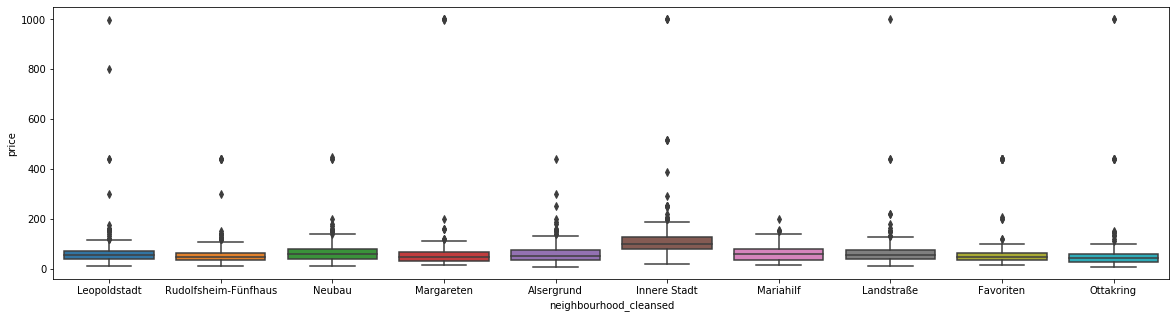

In [28]:
import seaborn as sns
ax = sns.boxplot(x='neighbourhood_cleansed', y='price', data=df_short)

We have a few columns that contain categorical variables. These are handled in slightly different ways depending on their possible values.
The 'neighborhood_cleansed' field, in its raw form, is a string representing the name of the neighborhood. The regressors in scikit-learn will only accept numeric fields. For this type of variable we can use the get_dummies routine in Pandas to convert these to 'dummy' variables. This process is also known as "one hot" encoding, meaning we add a column for every possible value of the field. Each listing (row) contains a '1' in for its own neighborhood, else the column contains a '0' for that neighborhood.

We handle this in a similar way for the 'room_type' and 'cancellation_policy' fields.

For the instant_bookable field, we can represent it with a single column since it's a boolean value (it represents whether or not the unit can be booked instantly online without confirmation from the owner).

In [29]:
# get feature encoding for categorical variables
n_dummies = pd.get_dummies(df.neighbourhood_cleansed)
rt_dummies = pd.get_dummies(df.room_type)
xcl_dummies = pd.get_dummies(df.cancellation_policy)

# convert boolean column to a single boolean value indicating whether this listing has instant booking available
ib_dummies = pd.get_dummies(df.instant_bookable, prefix="instant")
ib_dummies = ib_dummies.drop('instant_f', axis=1)

# replace the old columns with our new one-hot encoded ones
alldata = pd.concat((df.drop(['neighbourhood_cleansed', \
    'room_type', 'cancellation_policy', 'instant_bookable'], axis=1), \
    n_dummies.astype(int), rt_dummies.astype(int), \
    xcl_dummies.astype(int), ib_dummies.astype(int)), \
    axis=1)
allcols = alldata.columns
alldata.head(5)

,id,accommodates,bedrooms,beds,price,availability_30,number_of_reviews,review_scores_rating,reviews_per_month,Alsergrund,...,Hotel room,Private room,Shared room,flexible,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,instant_t
0,15883,3,1.0,1.0,85.0,21,10,96.0,0.18,0,...,1,0,0,0,1,0,0,0,0,1
1,38768,5,1.0,3.0,65.0,10,303,95.0,2.87,0,...,0,0,0,0,0,0,1,0,0,0
4,70568,2,1.0,1.0,59.0,30,10,94.0,0.10,0,...,0,0,0,0,0,0,1,0,0,0
5,70637,2,1.0,2.0,50.0,5,111,95.0,1.05,0,...,0,1,0,0,1,0,0,0,0,0
8,78416,4,1.0,2.0,55.0,12,177,87.0,1.68,0,...,0,0,0,0,0,0,1,0,0,1


Using the ```scatter_matrix``` function in Pandas next, we can quickly show a matrix of each feature as a function of another, checking for any collinearity among the features. The cells along the diagonal of this matrix contain a histogram, with the values shown along the X axis. Collinearity in this case is less likely because we've picked a small set of features that are not obviously related to each other, but it's a good thing to check anyway to see if we have anything that will throw things off.

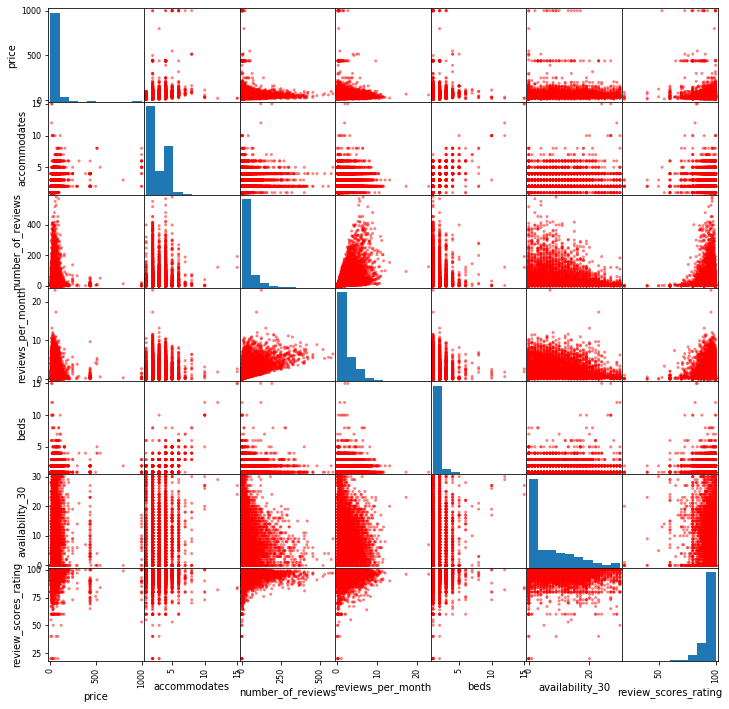

In [30]:
scattercols = ['price','accommodates', 'number_of_reviews', 'reviews_per_month', 'beds', 'availability_30', 'review_scores_rating']
axs = pd.plotting.scatter_matrix(alldata[scattercols],
                        figsize=(12, 12), c='red')

Looking at the output of ```scatter_matrix```, no features show any obvious problems. 
The most closely related features appear to be 'beds' and 'accommodates'.
It's true that the more beds a unit has, the more it accommodates for sleeping,
but even these are only loosely related and the result is far from a straight line.
Presumably this is because of different bed sizes, sleeping arrangements, and
layout of the rental unit.

### Making Predictions with Scikit-Learn and Spark

One of the great things about scikit-learn is that we can easily try a bunch of different linear models on the same data. This will give us some clues as to where we can start tuning. We will start with six of them: vanilla linear regression, ridge and lasso regressions, ElasticNet, bayesian ridge, and a lesser used one called Orthogonal Matching Pursuit.

To evaluate which model(s) are doing better, we will need some way to score the results. In this example I've chosen median absolute error, mainly because it makes sense at a glance (it easily translates to a dollar amount relative to price) and is less sensitive to outliers than other metrics like mean squared error.

Speaking of which, it is fairly likely that we have some outliers in the data since we haven't done any filtering or clustering for them, so this is a good way to get a quick and dirty measure of performance before we move to fine-tuning (and of course, we could do more with outliers in the data preparation step).

Kenttä 'id' pitää poistaa tarkastelusta, sillä se aiheuttaa laskentatarkkuusongelman lineaarimallissa Ridge.

got error 14.55
got error 14.56
got error 14.05
got error 15.81
got error 14.38
got error 13.85


Text(0, 0.5, 'Median Absolute Error')

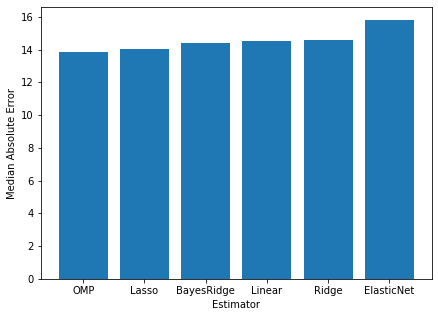

In [31]:
rs = 1
ests = [ linear_model.LinearRegression(), linear_model.Ridge(),
        linear_model.Lasso(), linear_model.ElasticNet(),
        linear_model.BayesianRidge(), linear_model.OrthogonalMatchingPursuit() ]
ests_labels = np.array(['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'BayesRidge', 'OMP'])
errvals = np.array([])

X_train, X_test, y_train, y_test = train_test_split(alldata.drop(['price', 'id'], axis=1),
                                                    alldata.price, test_size=0.2, random_state=20)

for e in ests:
    e.fit(X_train, y_train)
    this_err = metrics.median_absolute_error(y_test, e.predict(X_test))
    print("got error %0.2f" % this_err)
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt], align='center')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('Median Absolute Error')

Looking at the error from each of these six estimators, they appear to be roughly the same with most of the estimators being able to predict the price with a median error around 30-35 dollars, with BayesRidge coming out on top by a small margin. Having the results be this close isn't surprising, because we haven't done any tuning. The results give us a good general idea of where we stand with the individual estimators.

Next we'll try an ensemble method to see if we can get better results. The upside is that we will likely get a better score, and the downside is that the ensemble methods have a bewildering variety of hyperparameters that must be tuned, each of which can affect our model and requires some experimentation to get right. The common way to approach this is to use an exhaustive "grid search" which simply tries all the supplied parameter combinations and uses cross-validation folding to find the best one. Scikit-learn provides the very handy GridSearchCV function for this purpose.

The tradeoff of using GridSearchCV is that the exhaustive search and cross-validation can take a lot of CPU and time. This is where we can use Spark to distribute the search to more machines and cores, enabling us to test more combinations faster.

For our first attempt, we'll limit the number of parameters just so we can get the results back quickly and see if we're doing better than any of the individual methods above.

In [32]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

sorted(sklearn.metrics.SCORERS.keys())

The scikit-learn version is 0.21.3.


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [33]:
n_est = 500

tuned_parameters = {
    "n_estimators": [ n_est ],
    "max_depth" : [ 4 ],
    "learning_rate": [ 0.01 ],
    "min_samples_split" : [ 2 ],
    "loss" : [ 'ls', 'lad' ]
}

gbr = ensemble.GradientBoostingRegressor()
clf = GridSearchCV(gbr, cv=3, param_grid=tuned_parameters,
        scoring='neg_median_absolute_error')
preds = clf.fit(X_train, y_train)
best = clf.best_estimator_
best

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='lad', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
abs(clf.best_score_)

10.158245266881435

The result of this attempt is a median error of $23.64.

Already, it looks like we're doing better with GradientBoostingRegressor than we were with any of the prior attempts. Without doing any tuning, the median error is around 20% less than the best error of the previous group (with BayesRidge()).

Let's get a quick measure of how the error is affected by each round of boosting, so we can see if throwing more iterations at the problem is going to help.

Text(0, 0.5, 'Least Absolute Deviation')

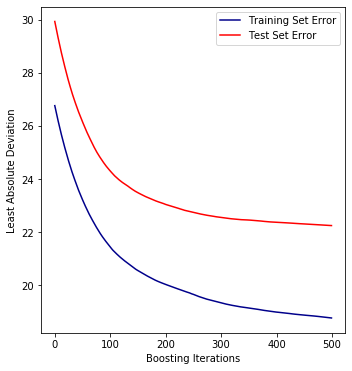

In [35]:
# plot error for each round of boosting
test_score = np.zeros(n_est, dtype=np.float64)

train_score = best.train_score_
for i, y_pred in enumerate(best.staged_predict(X_test)):
    test_score[i] = best.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(n_est), train_score, 'darkblue', label='Training Set Error')
plt.plot(np.arange(n_est), test_score, 'red', label='Test Set Error')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Least Absolute Deviation')

It looks like the curve is flattening near the right side of the plot (after around 200-250 iterations), but is still benefitting from more iterations, so we could increase the iterations to 500 without much thought.

Now we can do some tuning with GridSearchCV and explore more of the hyperparameter combinations. However, this requires some serious CPU and a complete run of all of the combinations can easily take hours to finish, even on a small number of rows.

By simply replacing the following lines in our file, we can use the new spark-sklearn integration package running on the [MapR 5.1 platform with Spark as a YARN client](http://maprdocs.mapr.com/51/index.html#Spark/SparkonYARN.html) to distribute the iterations across the machines in a cluster. This allows us to test more hyperparameter combinations, ultimately reducing error, and we can do it all in less time.

```
from pyspark import SparkContext, SparkConf
from spark_sklearn import GridSearchCV

conf = SparkConf()
sc = SparkContext(conf=conf)
clf = GridSearchCV(sc, gbr, cv=3, param_grid=tuned_parameters, scoring='median_absolute_error')
```

You can then run the script in this notebook with the following command, setting --num-executors and --executor-cores to suit your Spark environment:

```
time MASTER=yarn-client /opt/mapr/spark/spark-1.5.2/bin/spark-submit --num-executors=2 --executor-cores=8 python_scikit_airbnb.py
```

It's worth pausing here to note that the architecture of this approach is different than that used by MLlib in Spark. Using spark-sklearn, we're simply distributing the cross-validation run of each model (with a specific combination of hyperparameters) across each Spark executor. Spark MLlib, on the other hand, will distribute the internals of the actual learning algorithms across the cluster.
The main advantage of spark-sklearn is that it enables leveraging the very rich set of machine learning algorithms in scikit-learn. These algorithms do not run natively on a cluster (although they can be parallelized on a single machine) and by adding Spark, we can unlock a lot more horsepower than could ordinarily be used.

**Using this approach we can get the error down even further, to $21.43**, with a substantial reduction in time.

Finally let's look at the feature importances to see which features were most influential in predicting the listing price. This will show us a relative scoring of how important each feature is relative to the feature with the most importance.

Text(0.5, 1.0, 'Variable Importance')

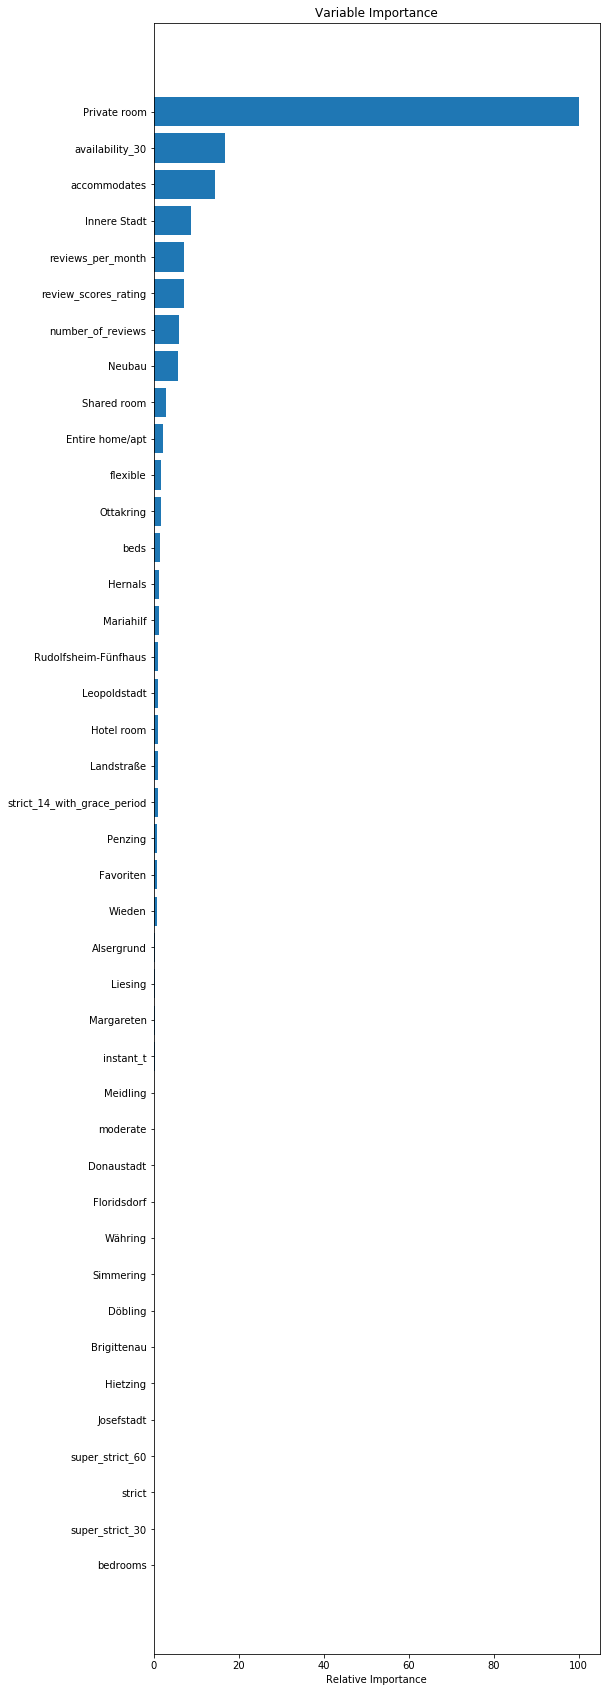

In [36]:
feature_importance = clf.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
pvals = feature_importance[sorted_idx]
pcols = X_train.columns[sorted_idx]
plt.figure(figsize=(8,30))
plt.barh(pos, pvals, align='center')
plt.yticks(pos, pcols)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

Clearly some of the variables have more influence than others, and the results here are somewhat intuitive. The most influential feature is the 'Entire home/apt' attribute; this indicates whether or not the unit is shared with other people, and has the most effect in setting the price. We would probably expect this feature to be high on the list, and it might be even higher o Reviews are important, as is the short-term availability of the unit, and the Ocean View and Excelsior neighborhood features also scored high.

### Conclusions

In this example we looked at how to predict the price using multiple factors, then scale-out our cross validation and hyperparameter search across a MapR cluster using Spark. We learned the following key points:

* In this case, the ensemble method we tried (GradientBoostingRegressor) had better results than any individual estimator.

* With GridSearchCV, we tested more hyperparameter combinations that ultimately led us to a better result.

* Using [spark-sklearn](https://github.com/databricks/spark-sklearn) is a straightforward way to throw more CPU at any machine learning problem you might have.  We used the package to reduce the time spent searching and reduce the error for our estimator.

There are many ways in which our first-pass analysis could be improved.  For example, we might start including more of the data from Inside Airbnb.  We could do sentiment analysis on the text of the reviews, bringing this in as an additional feature.

A quick way to try the example code here on your own is with the [MapR Sandbox](https://www.mapr.com/products/mapr-sandbox-hadoop/tutorials/spark-tutorial), which comes pre-installed with MapR-FS and Spark.

In the next post in the series we'll look at how to to apply the same technique to building a classifier.


In [37]:
df_room_type_ext = df.groupby(
     ['room_type']
  ).agg(
    count=('price', len),
    max_price=('price', max),
    min_price=('price', min),
    median_price=('price', np.median),
    mean_price=('price', np.mean),
    dev=('price', np.std)
  )
df_room_type_ext.head(50)

,count,max_price,min_price,median_price,mean_price,dev
room_type,,,,,,
Entire home/apt,4329.0,1000.0,9.0,62.0,76.343497,78.195248
Hotel room,79.0,207.0,30.0,88.0,92.987342,41.706389
Private room,2328.0,500.0,9.0,30.0,36.051976,21.472129
Shared room,68.0,130.0,9.0,30.5,39.308824,27.336629


In [38]:
df_neighbourhoods_ext = df.groupby(
     ['neighbourhood_cleansed']
  ).agg(
    count=('price', len),
    max_price=('price', max),
    min_price=('price', min),
    median_price=('price', np.median),
    mean_price=('price', np.mean),
    dev=('price', np.std)
  )

df_neighbourhoods_ext.sort_values(by=['count'], ascending=False). \
                      sort_values(by=['median_price'], ascending=False).head(10)

,count,max_price,min_price,median_price,mean_price,dev
neighbourhood_cleansed,,,,,,
Innere Stadt,313.0,1000.0,19.0,98.0,117.089457,107.260071
Neubau,506.0,450.0,11.0,60.0,65.051383,41.575523
Mariahilf,362.0,200.0,14.0,59.0,60.823204,28.942616
Leopoldstadt,740.0,999.0,10.0,55.0,60.860811,54.912092
Landstraße,620.0,1000.0,10.0,55.0,61.454839,51.273598
Brigittenau,257.0,125.0,12.0,55.0,55.046693,21.217018
Wieden,296.0,1000.0,18.0,52.0,65.375000,82.355315
Donaustadt,170.0,150.0,15.0,50.0,51.600000,25.864325
Alsergrund,439.0,440.0,9.0,50.0,59.168565,38.384010


In [39]:
p = df.price
print("\t\t  %.1f   %.1f     %.1f      %.1f  %.5f %.5f" % (len(df),p.max(),p.min(),p.median(),p.mean(),p.std()))

		  6804.0   1000.0     9.0      50.0  62.38081 66.72678
